## ORB

- An efficient alternative to SIFT or SURF
- FAST detector + Oriented BRIEF

- Binary descriptor이기 때문에 0, 1값만 있는 descriptor.
    - L2 distance를 사용하는 것이 아닌 binary distance를 사용.

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [45]:
src = cv2.imread("./data/apple_books.jpg")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
target = cv2.imread("./data/apple.jpg", cv2.IMREAD_GRAYSCALE)

In [56]:
orb = cv2.ORB_create(
    nfeatures=40000,
    scaleFactor=1.2,
    nlevels=8,
    edgeThreshold=31,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=31,
    fastThreshold=20,
)

In [57]:
kp1, des1 = orb.detectAndCompute(gray, None)
kp2, des2 = orb.detectAndCompute(target, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) # brute force

matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

In [58]:
print(len(matches), np.array(matches).shape)
print(matches) # match 개수 * 2인 matrix

3341 (3341,)
[< cv2.DMatch 000001AC920B5770>, < cv2.DMatch 000001AC920B5250>, < cv2.DMatch 000001AC95597950>, < cv2.DMatch 000001AC957D15B0>, < cv2.DMatch 000001AC925A58F0>, < cv2.DMatch 000001AC955992F0>, < cv2.DMatch 000001AC957D8D90>, < cv2.DMatch 000001AC92591910>, < cv2.DMatch 000001AC920B5350>, < cv2.DMatch 000001AC955978D0>, < cv2.DMatch 000001AC957CDB90>, < cv2.DMatch 000001AC92596C30>, < cv2.DMatch 000001AC920B5BB0>, < cv2.DMatch 000001AC92589330>, < cv2.DMatch 000001AC957D1530>, < cv2.DMatch 000001AC925A5750>, < cv2.DMatch 000001AC92582DD0>, < cv2.DMatch 000001AC9258AD30>, < cv2.DMatch 000001AC920B5D90>, < cv2.DMatch 000001AC957D8330>, < cv2.DMatch 000001AC957D2BF0>, < cv2.DMatch 000001AC957D2C70>, < cv2.DMatch 000001AC92585850>, < cv2.DMatch 000001AC92585390>, < cv2.DMatch 000001AC925A5AD0>, < cv2.DMatch 000001AC92582230>, < cv2.DMatch 000001AC921DA630>, < cv2.DMatch 000001AC925966B0>, < cv2.DMatch 000001AC9258E510>, < cv2.DMatch 000001AC9258A890>, < cv2.DMatch 000001AC957D2

In [59]:
for i in matches[:100]:
    idx = i.queryIdx
    x1, y1 = kp1[idx].pt
    cv2.circle(src, (int(x1), int(y1)), 3, (255, 0, 0), 3)
    
    x2, y2 = kp2[idx].pt
    cv2.circle(src, (int(x2), int(y2)), 3, (255, 0, 0), 3)

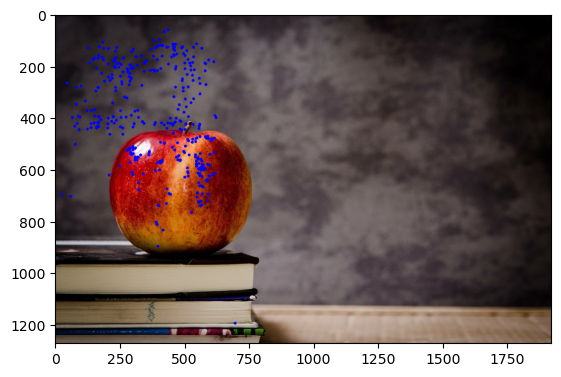

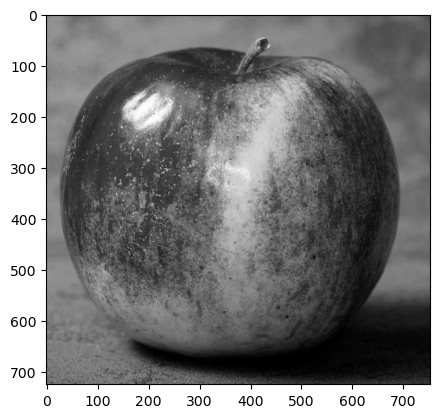

In [60]:
plt.imshow(src[: ,:, ::-1])
plt.show()

plt.imshow(target[: ,:], 'gray')
plt.show()